In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io
import sys

In [11]:
#orignal images in github
#commented out line is for running in colab without using shell
sys.argv=['self.py', 256, 'image1.jpg', 'image2.jpg', 'image3.jpg']
n_colors = int(sys.argv[1])
imagename = [sys.argv[2], sys.argv[3], sys.argv[4]]

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)


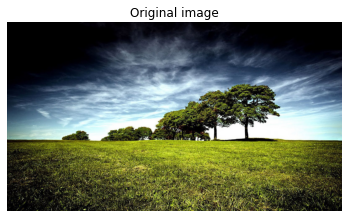

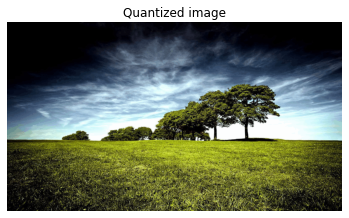

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)


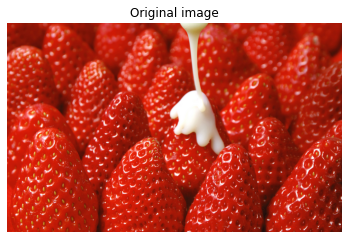

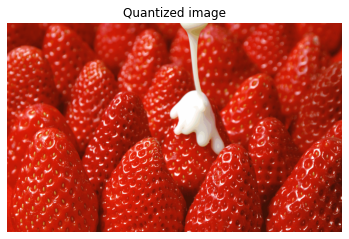

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)


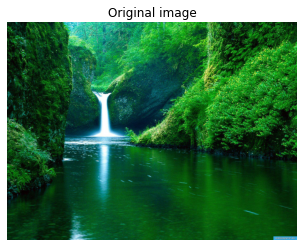

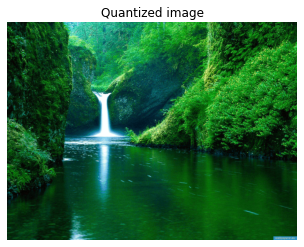

In [12]:
# Load the images
for i in range(0,3):
  image = io.imread(imagename[i])
  #Convert to float, divide by 255
  image = np.array(image, dtype=np.float64) / 255

  # Load Image and transform to a 2D numpy array.
  w, h, d = original_shape = tuple(image.shape)
  assert d == 3
  image_array = np.reshape(image, (w * h, d))

  print("Fitting model on a small sub-sample of the data")
  image_array_sample = shuffle(image_array, random_state=0)[:1000]
  kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

  # Get labels for all points
  print("Predicting color indices on the full image (k-means)")
  labels = kmeans.predict(image_array)

  def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
      for j in range(h):
        image[i][j] = codebook[labels[label_idx]]
        label_idx += 1
    return image

  # Display all results, alongside original image
  plt.figure(1)
  plt.clf()
  plt.axis('off')
  plt.title('Original image')
  plt.imshow(image)

  plt.figure(2)
  plt.clf()
  plt.axis('off')
  plt.title('Quantized image')
  quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
  plt.imshow(quantized_image)

  #io.imsave('quantizedImages/'+ filename[i],quantized_image)
  plt.show()